# Week 5: Make Naive Predictions

In [163]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import pickle
import matplotlib.pylab as plt
import matplotlib.dates as mdates

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,5)

In [131]:
with open('data/data.pickle', 'rb') as handle:
    data = pickle.load(handle)

## Remove duplicates

In [133]:
data = data.drop_duplicates()

In [134]:
print(str(round(((9886354 / len(data) - 1)*100),3)) + "% of records are removed so far")

2.677% of records are removed so far


In [136]:
bus1 = data[data['licence_plate_number']=="粤E19212"]
bus1.head(1)

,licence_plate_number,route,longitude,latitude,calibrated_time,raw_time
30,粤E19212,116,113.14626,23.02151,2015-07-01 00:01:36,2015-07-01 00:01:40


## Visualization

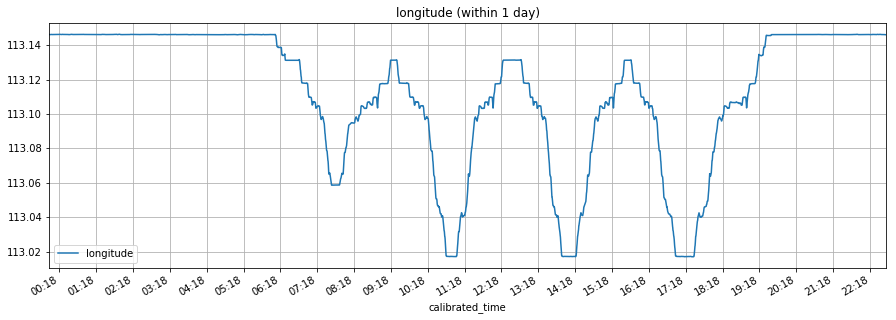

In [332]:
fig, ax = plt.subplots()
bus1[:7000].plot(x="calibrated_time",y="longitude",grid=True, ax=ax)

ax.set_title("longitude (within 1 day)")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=60))

plt.show()

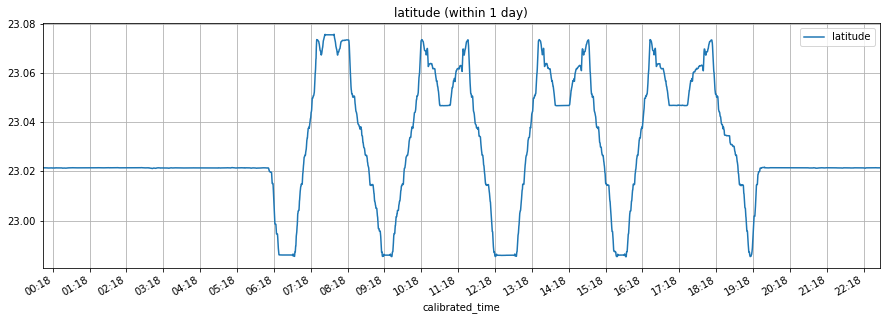

In [315]:
ax = bus1[:7000].plot(x="calibrated_time",y="latitude",grid=True)
ax.set_title("latitude (within 1 day)")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=60))
plt.show()

## Split data into training and testing sets

In [356]:
bus1_period = max(bus1["calibrated_time"])-min(bus1["calibrated_time"])
train = bus1[bus1["calibrated_time"] < min(bus1["calibrated_time"])+timedelta(days=30*0.8)]
test = bus1[bus1["calibrated_time"] >= min(bus1["calibrated_time"])+timedelta(days=30*0.8)]

## Zoom in on the start station

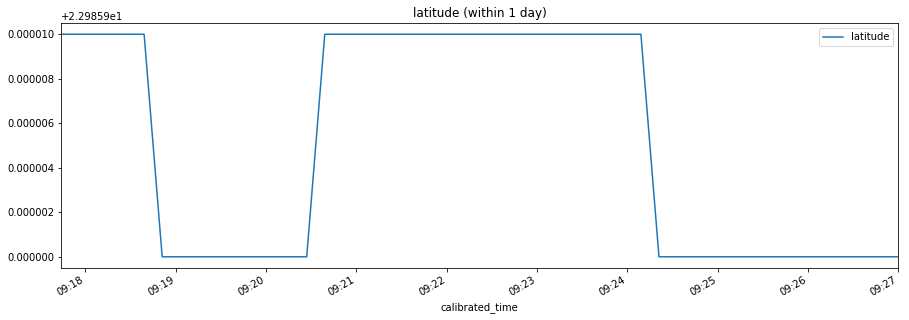

In [317]:
ax = bus1[2858:2905].plot(x="calibrated_time",y="latitude")
ax.set_title("latitude (within 1 day)")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
plt.show()

## Find the range of the start station

In [324]:
b = (bus1[["longitude","latitude","calibrated_time"]]-bus1[["longitude","latitude","calibrated_time"]].shift())[2858:2905]
print(max(b.longitude)-min(b.longitude))
print(max(b.latitude)-min(b.latitude))
print(max(bus1.longitude[2858:2905]))
print(max(bus1.longitude[2858:2905]))
print(max(bus1.latitude[2858:2905]))
print(min(bus1.latitude[2858:2905]))

5.00000000017e-05
0.000149999999998
113.13135
113.13135
22.98591
22.9859


## Zoom in on the end station

In [726]:
(bus1["calibrated_time"]-bus1["calibrated_time"].shift()).value_counts()

00:00:12    190716
00:00:00      9884
00:00:13      6446
00:00:11      4885
00:00:23      1930
00:00:24      1374
00:00:07      1015
00:00:14       353
00:00:10       317
00:00:15       199
00:00:03       187
00:00:04       147
00:00:06       142
00:00:05       140
00:00:08       135
00:00:02       105
00:00:01        98
00:00:09        98
00:00:16        64
00:00:36        63
00:00:18        56
00:00:25        55
00:00:22        54
00:00:17        48
00:00:19        41
00:00:48        23
00:01:00        16
00:00:20        14
00:01:12        12
00:00:26         9
             ...  
00:03:36         1
00:06:21         1
00:02:20         1
00:02:10         1
00:03:29         1
00:02:13         1
00:12:34         1
00:02:04         1
00:01:05         1
00:01:37         1
00:06:27         1
00:02:11         1
00:21:04         1
00:00:55         1
00:04:05         1
00:10:15         1
00:02:01         1
00:01:53         1
00:03:07         1
10:15:01         1
00:02:36         1
00:01:08    

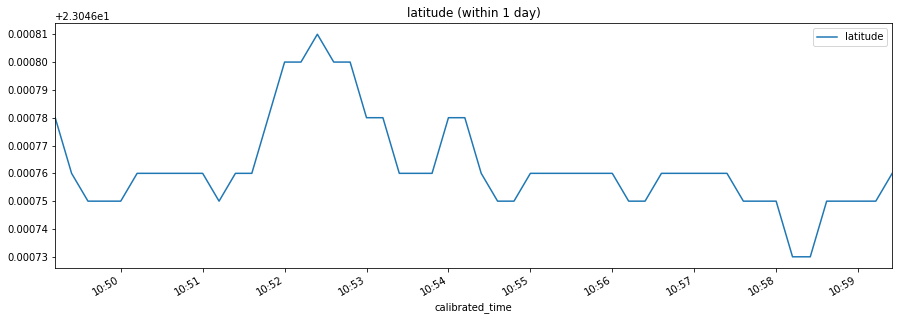

In [318]:
ax = bus1[3345:3400].plot(x="calibrated_time",y="latitude")
ax.set_title("latitude (within 1 day)")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
plt.show()

## Find the range of the end station

In [721]:
a = (bus1[["longitude","latitude","calibrated_time"]]-bus1[["longitude","latitude","calibrated_time"]].shift())[3345:3400]
print(max(a.longitude)-min(a.longitude))
print(max(a.latitude)-min(a.latitude))
print("maximum longitude: ",max(bus1.longitude[3345:3400]))
print("minimum longitude: ",min(bus1.longitude[3345:3400]))
print("maximum latitude: ",max(bus1.latitude[3345:3400]))
print("minimum latitude: ",min(bus1.latitude[3345:3400]))

9.00000000001e-05
4.00000000056e-05
maximum longitude:  113.0172
minimum longitude:  113.01705
maximum latitude:  23.04681
minimum latitude:  23.04673


## Is Baidu's geolocation consistent with Data's?

In [705]:
# # Baidu map's statistics has some discrepancy with GPS data
# start_station = [113.14303,22.99001]
# end_station = [113.029254,23.050776]

# Data's statistics
end_station = [113.0172, 23.04681]
start_station = [113.13135, 22.9859]
precision = 0.00015

print("Biadu's start station in the range of the Data's starting statoin?",
      (113.14303 in np.arange(start_station[0]-precision, start_station[0]+precision, 1e-5)) &
     (22.99001 in np.arange(start_station[1]-precision, start_station[1]+precision, 1e-5)))
print("Biadu's end station in the range of the Data's starting statoin?",
      (113.029254 in np.arange(end_station[0]-precision, end_station[0]+precision, 1e-5)) &
     (23.04681 in np.arange(end_station[1]-precision, end_station[1]+precision, 1e-5)))

Biadu's start station in the range of the Data's starting statoin? False
Biadu's end station in the range of the Data's starting statoin? False


## Which point to cut?

In [546]:
print(np.mean(bus1[3345:3400].longitude>end_station[0]-precision))
print(np.mean(bus1[3345:3400].longitude<end_station[0]+precision))
print(np.mean(bus1[2858:2905].longitude>start_station[0]-precision))
print(np.mean(bus1[2858:2905].longitude<start_station[0]+precision))

0.981818181818
1.0
1.0
1.0


## Cut data into different trips

In [706]:
def instantiate(data, start_station, end_station,precision):   
    predictors = []
    target = []
    temp = []

    in_a_shift = False
    num = 0
    for i in np.arange(len(data)):
        point = data.iloc[i]

        # if it is at start station
        if start_station[0]-precision < point.longitude < start_station[0]+precision and \
        start_station[1]-precision < point.latitude < start_station[1]+precision:
            num = 0 if not in_a_shift else num
            in_a_shift = True

        # if arrives at end station
        elif end_station[0]-precision < point.longitude < end_station[0]+precision and \
        end_station[1]-precision < point.latitude < end_station[1]+precision:
            if in_a_shift:
                target += [point["calibrated_time"]] * num
            in_a_shift = False
            
        
        # if at start station, or in between start and end station
        if in_a_shift:
            num += 1
            predictors.append(list(point[["longitude","latitude","calibrated_time"]]))
            
    predictors = pd.DataFrame(predictors,columns=["longitude","latitude","calibrated_time"])
    target = pd.DataFrame(target,columns=["destination_time"])
    return(
        pd.concat([predictors, target],axis=1) 
    )

In [707]:
test_instances = instantiate(test, start_station, end_station, precision)
train_instances = instantiate(train, start_station, end_station, precision)

## Visualization after the cut

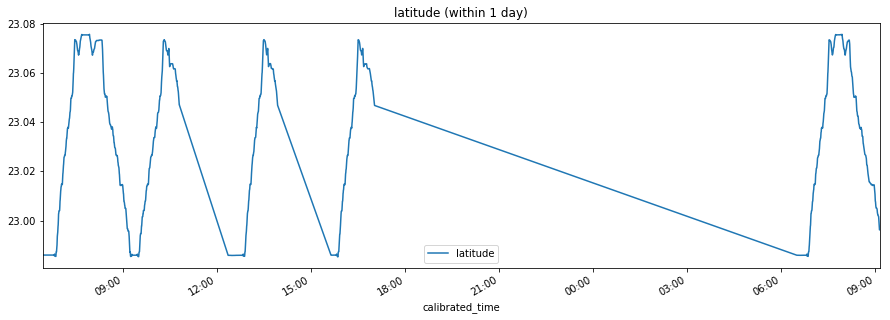

In [708]:
ax = train_instances[:3000].plot(x="calibrated_time",y="latitude")
ax.set_title("latitude (within 1 day)")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
plt.show()

In [713]:
from IPython.display import display, Math, Latex

## Create a new column $\Delta t$

In [709]:
test_instances["delta_t"] = (test_instances["destination_time"] - test_instances["calibrated_time"]).apply(lambda x: x.total_seconds())
train_instances["delta_t"] = (train_instances["destination_time"] - train_instances["calibrated_time"]).apply(lambda x: x.total_seconds())
test_instances["hour"] = test_instances["calibrated_time"].apply(lambda x: x.hour)
train_instances["hour"] = train_instances["calibrated_time"].apply(lambda x: x.hour)

In [722]:
bus1.head(1)

,licence_plate_number,route,longitude,latitude,calibrated_time,raw_time
30,粤E19212,116,113.14626,23.02151,2015-07-01 00:01:36,2015-07-01 00:01:40


In [723]:
# start_range = [(113.145, 113.147), (23.0205, 23.0225)]
start_range = [(113.130, 113.132), (22.985, 22.986)]

end_range = [(113.0165, 113.0185)  , (23.046, 23.048)]

shifts = []

temp = []
for i in np.arange(len(bus1)):
    if bus1.iloc[i,2] < start_range[0][1] and bus1.iloc[i,3] > start_range[0][0] and bus1.iloc[i,2] < start_range[1][1] and bus1.iloc[i,3] > start_range[1][0]:
        temp = [(i, bus1.loc[i,4], bus1.loc[i,5])]
        print("haha")
    elif bus1.iloc[i,2] < end_range[0][1] and bus1.iloc[i,3] > end_range[0][0] and bus1.iloc[i,2] < end_range[1][1] and bus1.iloc[i,3] > end_range[1][0]:
        if len(temp)>800 and len(temp)<2500:
            shifts.append(temp)
        temp = []
        print("xixi")
    elif len(temp)>0:
        temp.append((i, bus1.iloc[i,3], bus1.iloc[i,4]))
        print("lol")
        

## Sample some timestamps as training set

## Train a regression model

In [710]:
from sklearn import svm

clf = svm.SVR(kernel='rbf')
clf.fit(train_instances[["longitude","latitude","hour"]], train_instances["delta_t"]) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predict on the testing set

In [711]:
predictions = clf.predict(test_instances[["longitude","latitude","delta_t"]])

## Evaluate the predictions


In [730]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("the error is +/- ", round(mean_absolute_error(predictions, test_instances["delta_t"])/60,2), " minutes")

the error is +/-  35.69  minutes
